# Machine Learning

<a href="http://projecteuclid.org/download/pdf_1/euclid.ss/1009213726">
### Statistics vs Machine Learning
</a>

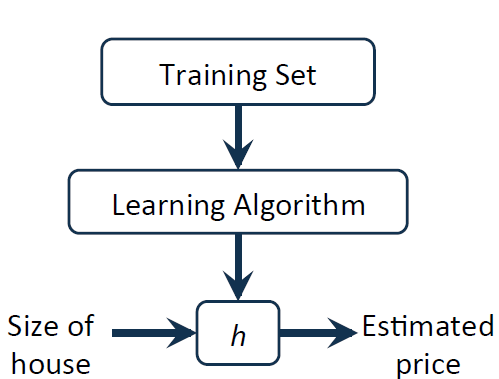

In [1]:
using Images

imread("src/ML_Outline.png")

In [3]:
using DataFrames

df = readtable("src/houseprice.csv")

,x0,Size_feet2_x1,Bedrooms_x2,Floors_x3,Age_years_x4,Price_1000_y
1,1,2140,5,1,45,460
2,1,1416,3,2,40,232
3,1,1534,3,2,30,315
4,1,852,2,1,36,178


#### Terminilogy:
$\hspace{3em} m$ = number of samples i.e. len(training examples)

$\hspace{3em} n$ = number of features

$\hspace{3em} x^{(i)}$ = input variable (features) of the $i^{th}$ training example.

$\hspace{3em} x_j^{(i)}$ = value of variable (features) $j$ in the $i^{th}$ training example.

$\hspace{3em} y^{(i)}$ = output variables (training OR target) of the $i^{th}$ training example

$\hspace{3em} \theta$ = parameters/ weights

$\hspace{3em} \theta_j$ = parameter/ weight of $j$

(Refer video 4-1)

# We train the data to find the "HYPOTHESIS" (equation)


### Basic Algebra

$$ y = mx + c $$

fit_y = intercept + slope * x = [0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]

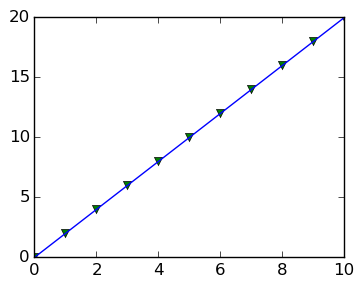

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe8c2b41be0>

In [46]:
x = collect(0:10)
y = 2x


function linefit(x, y)
    intercept = linreg(x,y)[1]
    slope = linreg(x,y)[2]
    return slope, intercept
end

slope, intercept = linefit(x,y)

@show fit_y = intercept+(slope*x)

using PyPlot

PyPlot.figure(figsize=(4, 3))
plot(x,y, "gv")
plot(x,fit_y, "b-")

$$ Y = C + m X \pm error $$
    
    Assume every data point(y) can be represented as mx+C.
$$ Y_1 = \theta_0 + \theta_1 X_1 \pm error $$
$$ Y_2 = \theta_0 + \theta_1 X_2 \pm error $$
$$ Y_3 = \theta_0 + \theta_1 X_3 \pm error $$
$$~~~.~~~~~.~~~~~~~~~.~~~~~~~~~~~~~~~.~~~$$
$$~~~.~~~~~.~~~~~~~~~.~~~~~~~~~~~~~~~.~~~$$
$$~~~.~~~~~.~~~~~~~~~.~~~~~~~~~~~~~~~.~~~$$

$$ Y_n = \theta_0 + \theta_1 X_n \pm error $$

#### Matrix Form

$$
    \begin{bmatrix}
      Y_1  \\
      Y_2  \\
      Y_3  \\
      ~.~\\
      ~.~\\
      Y_n  \\
     \end{bmatrix}
    =
    \begin{bmatrix}
      \theta_0 + \theta_1 X_1 \\
      \theta_0 + \theta_1 X_2 \\
      \theta_0 + \theta_1 X_3 \\
        ~~~.~~~~~.~~~~~~~~~.~\\
        ~~~.~~~~~.~~~~~~~~~.~\\
       \theta_n + \theta_1 X_n \\
     \end{bmatrix}
    \pm
    \begin{bmatrix}
      \epsilon_1 \\
      \epsilon_2 \\
      \epsilon_3 \\
        ~.~\\
        ~.~\\
       \epsilon_n \\
     \end{bmatrix}
$$

$$   \begin{bmatrix}
      Y_1  \\
      Y_2  \\
      Y_3  \\
      ~.~\\
      ~.~\\
      Y_n  \\
     \end{bmatrix}
    =
    \begin{bmatrix}
      1~~ X_1 \\
      1~~ X_2 \\
      1~~ X_3 \\
        ~~~.~~~.~~\\
        ~~~.~~~.~~\\
       1~~ X_n \\
     \end{bmatrix}
    \begin{bmatrix}
      \theta_0 \\
      \theta_1 \\
     \end{bmatrix} 
    \pm
    \begin{bmatrix}
      \epsilon_1 \\
      \epsilon_2 \\
      \epsilon_3 \\
        ~.~\\
        ~.~\\
       \epsilon_n \\
     \end{bmatrix}
$$ 

$\theta_{2x1}$ is the **Vector of parameters**

$X_{nx2}$ is **The Design/Data matrix**

$\epsilon_{nx1}$ is the **Vector of error terms**

$Y_{nx1}$ is the **Vector of Response**


$$ Prediction/Respose~vector = Data~matrix \times Parameters~vector $$

$$ Y_{nx1} = X_{nx2} \theta_{2x1} \pm \epsilon_{nx1}$$

Note:

Don't be confused by the variables $x~and~X$, ($x1 \ne X1$).

Above $X1, X2, X3$ are parameters (slopes for each data points).

Below $x1, x2, x3$ are features.

## Linear representation of Hypothesis

#### Hypothesis for each data point:

$$ h_\theta =  \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3+ .... + \theta_n x_n =\sum_{x=0}^n X_{n \times n} \theta_{n \times 1} $$


Remarks:

+ This basically a multi dimensions $ y = m_1x_1 + m_2x_2 + ..  + c $ for each data point.

+ Matrix multiplication is not associative. $AB \ne BA$.

# **$$ h_\theta (x) = y_{predicted} $$**

In [ ]:
hypo(xᵢ, θᵢ) = dot(xᵢ, θᵢ)

For each data point

$$ error (\epsilon)= h_\theta -  X . \theta $$

choose $ \theta $ such that $ h_\theta\approx y_i $ by reducing $ error (\epsilon) \to 0 $ 

[ $h_\theta$ of $x_i$ ]

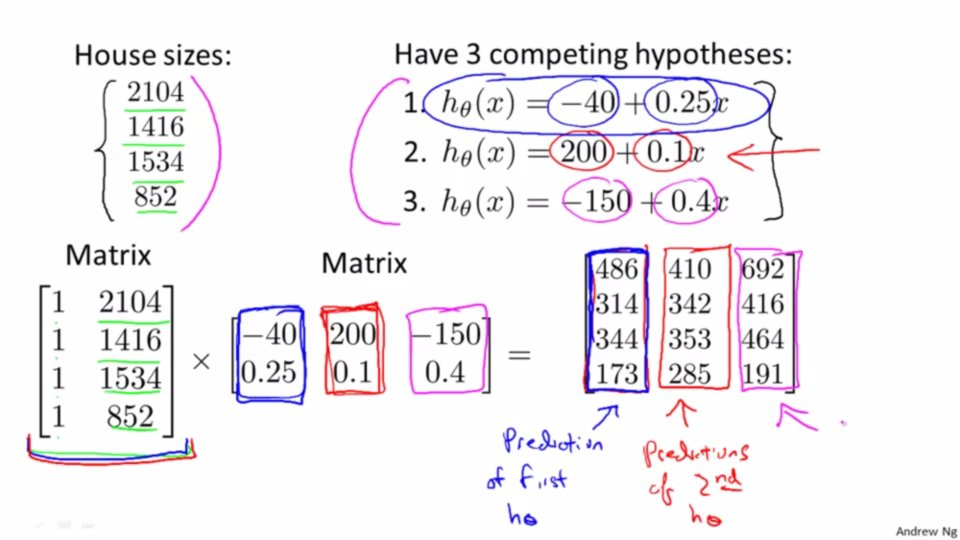

In [2]:
imread("src/hypo_matrix.jpg")

#### Cost / Error Function:
$$J(\theta_i)= \frac{1}{2m} \sum_{i=1}^m [h_\theta(x^i)-y^i)]^2 $$


Remark:


+ $h_\theta(x^i) = \sum_{j=0}^N \theta_j x_j^i = \theta_0 x_0^i+\theta_1 x_1^i + ... + \theta_n x_n^i  = y_{prediction}^i $

+ $J(\theta_0,..\theta_m) \equiv ( \epsilon_1, \epsilon_2, \epsilon_3)$

In [571]:
# X = features matrix
# y = target vector
# θ = parmeter vector

# For each hypothesis

function linear_cost_function(X, y, θ)
    m = length(y)
    
    uv = ones(length(y))
    X = hcat(uv,X)
    
    prediction = X*θ # h₀ will be a vector, each element in h₀ vector => f(x1,x2,x3...) for each data point.
    sum_of_square_errors = sum(abs2(prediction - y))
    cost = sum_of_square_errors / (2m)
    return cost
end

linear_cost_function (generic function with 1 method)

In [575]:
# y = 2x+1

X = [1, 2, 4.1]
y = [3, 5, 9]

θ = [1, 2]

linear_cost_function(X, y, θ)

0.006666666666666619

## Given X and y, how to find θ

For each data point

$$ error (\epsilon)= h_\theta -  X . \theta $$

choose $ \theta $ such that $ h_\theta\approx y_i $ by reducing $ error (\epsilon) \to 0 $ 

### Method 1: Gradient descent (Numerical method)

Gradient descent is a generalized algorithm which can be applied for a linear hypothesis.

$$\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j} J(\theta)$$


$\hspace{10em}(simulatenously~update~\theta_j ~for~all~j)$


Consider a $ \theta $ vector with $ \theta_0, \theta_1 $

**STEPS:**

+ Initialise $  \theta $. Pick a value for $\theta_0, \theta_1$ say $(0,0)$.
+ Update the parameters simultanously and store in a temp variable:
    + temp1 :=  $\theta_0 - \alpha \frac{\partial}{\partial\theta_0} * J(\theta_0, \theta_1)$
    + temp2 := $\theta_1 - \alpha \frac{\partial}{\partial\theta_0} * J(\theta_0, \theta_1)$
+ Update $\theta_0, \theta_1$
    + $\theta_0 $ := temp1
    + $\theta_1 $ := temp2


#### Gradient descent for a linear hypothesis

[Linear Hypothesis](#### Hypothesis for each data point:)

In the case of linear hypothesis:

$J(\theta_i)= \frac{1}{2m} \sum_{i=1}^m \Big[ h_\theta(x^i)-y^i) \Big]^2 $

$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum^m_{i=1} \Big[ h_\theta(x^i) - y^i \Big]x_j^i$

After substituting $J_{\theta}$ and similifying

$$ \theta_j := \theta_j - \frac{\alpha}{m} \sum^m_{i=1} \Big( h_\theta(x^i) - y^i \Big)x_j^i
$$


In [525]:
function linear_gradient_descent(X, y, α, iterations)
    m = length(y)
        
    # add dummy to X
    uv = ones(size(y)[1])
    X1 = hcat(uv,X)
    
    #initialize thetas to zero
    θ = zeros((size(X1)[2])) 

    cost_history = zeros(0)
    
    for i in 1:iterations
        prediction = X1*θ
        loss = prediction - y
        
        sum_of_square_errors = sum(abs2(loss))
        cost = sum_of_square_errors / (2m)
        push!(cost_history, cost)
        
        gradient = transpose(X1)*loss
        θ = θ - α*gradient/m
#         println("Iteration ", i, ";  Cost=", cost, "  θ=",θ)
    end
    return θ, cost_history
end

linear_gradient_descent (generic function with 1 method)

In [515]:
# Example data
# y = 2x+1
X = [1, 2, 4]
y = [3, 5, 9];


linear_cost_function(X,y,θ) = 19.166666666666668

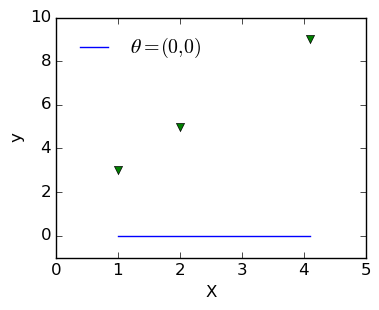

PyObject <matplotlib.legend.Legend object at 0x7fe8be93bda0>

In [573]:
#Before gradient descent

θ = [0, 0] # initialize θs to zero

@show linear_cost_function(X, y, θ)

lin_hyp = θ[1]+(θ[2]*X)

PyPlot.figure(figsize=(4,3))
plot(X,y, "gv")
plot(X,lin_hyp, "b-", label=L"θ = (0,0)")

PyPlot.xlabel("X")
PyPlot.ylabel("y")

PyPlot.xlim(0,5)
PyPlot.ylim(-1,10)
PyPlot.legend(loc=2, framealpha=0)

linear_cost_function(X,y,θ) = 0.00047938086257315885

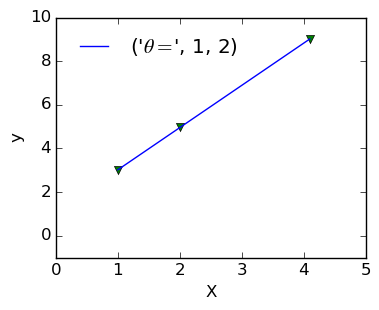

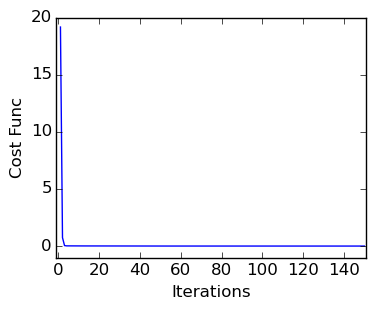

In [574]:
#After gradient descent

θ, cost_hist = linear_gradient_descent(X, y, 0.1, 150)

@show linear_cost_function(X, y, θ)

lin_hyp = θ[1]+(θ[2]*X)

PyPlot.figure(figsize=(4,3))
plot(X,y, "gv")
plot(X,lin_hyp, "b-", label=(L"θ = ", round(Int, θ[1]), round(Int, θ[2])))

PyPlot.xlabel("X")
PyPlot.ylabel("y")

PyPlot.xlim(0,5)
PyPlot.ylim(-1,10)
PyPlot.legend(loc=2, framealpha=0)

PyPlot.figure(figsize=(4,3))
plot(1:150,cost_hist, "b-")

PyPlot.xlabel("Iterations")
PyPlot.ylabel("Cost Func")

PyPlot.xlim(-1,151)
PyPlot.ylim(-1,20);


## Feature scaling (Normalizing)

**Normalization:**

$ x = \frac{x}{x_{max}}$

**Mean normalization:**

$x = x - \mu (mean)$

**General convention:**

$x = \frac{x - \mu}{range} $

range = max - min

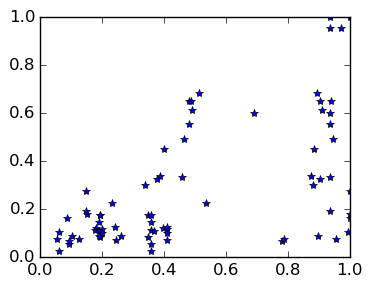

In [577]:
df = readtable("src/printingBusiness", separator=' ', header=true)
x1 = df[2]/maximum(df[2])
x2 = df[3]/maximum(df[3])

X = hcat(x1,x2)
y = df[4]/maximum(df[4]);

PyPlot.figure(figsize=(4,3))
plot(X,y, "b*");

θ = [0.09837846940778332,0.18781468276888486,0.24420168289283956]

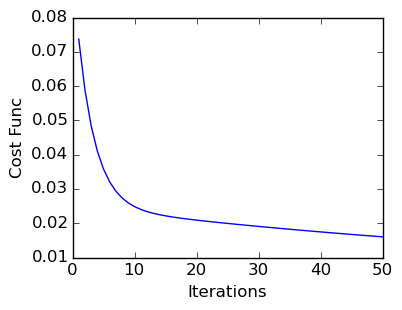


linear_cost_function(X,y,θ) = 0.01588803689141923


In [578]:
iterations = 50

θ, cost_hist = linear_gradient_descent(X, y, 0.1, iterations)

@show θ
@show linear_cost_function(X, y, θ)


PyPlot.figure(figsize=(4,3))
plot(1:iterations,cost_hist, "b-")

PyPlot.xlabel("Iterations")
PyPlot.ylabel("Cost Func");


## Polynomial reprsentation of Hypothesis 

#### Hypothesis for each data point

$$ h_\theta(x) =  \theta_0 x^0 + \theta_1 x_1^1+ \theta_2 x_2^2 + \theta_3 x_3^3+ .... + \theta_n x_n^n$$
$$ h_\theta(x) =  \theta_0 x^0 + \theta_1 x_1^1+ \theta_2 \sqrt{x_2} +  .... \theta_n f(x_n)$$

Many possible ways to represent $h_\theta(x)$ similar to a polynomial equation

Given data **x**, a column vector, and **y**, the target vector, the data matrix for a polynomial regression can be created by appending polynomials of **x**. For example, consider if

$$ \mathbf{x} = \begin{bmatrix}
       2    \\[0.3em]
       -1 \\[0.3em]
       \frac{1}{3}         
     \end{bmatrix}
$$

Using just this vector in linear regression implies the model:

$$y=\alpha_1x$$

We can add columns that are powers of the vector above, which represent adding polynomials to the regression. Below we show this for polynomials up to power 3:

$$
X = \begin{bmatrix}
       2 & 4 & 8 \\[0.3em]
       -1 & 1 & -1 \\[0.3em]
       \frac{1}{3} & \frac{1}{3^2} & \frac{1}{3^3}
     \end{bmatrix}
$$

This is our new data matrix that we use in sklearn's linear regression, and it represents the model:

$$y = \alpha_1 x + \alpha_2x^2 + \alpha_3x^3$$

Note that I did not add a constant vector of 1's, as sklearn will automatically include this.